# Imports and loads

In [1]:
import pandas as pd
import numpy as np
import warnings
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import h2o

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pickle
from h2o.automl import H2OAutoML

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.callbacks import EarlyStopping
import glob

warnings.filterwarnings('ignore')

In [2]:
# # Caminho onde os arquivos CSV estão localizados
# path = './'  # Altere para o diretório correto onde os arquivos estão localizados
# all_files = glob.glob(path + "data_live_scores*.csv")

# # Lista para armazenar os dataframes
# df_list = []

# # Ler cada arquivo CSV e adicionar à lista
# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df_list.append(df)

# # Concatenar todos os dataframes na lista
# combined_csv = pd.concat(df_list, axis=0, ignore_index=True)

# # Salvar o dataframe combinado em um arquivo CSV
# combined_csv.to_csv("data_live_scores.csv", index=False)


In [3]:
# import re

# df = pd.read_csv('data_live_scores.csv', encoding='ISO-8859-1')
# def is_valid_string(s):
#     if isinstance(s, str):
#         # Verifica se a string pode ser codificada e decodificada em UTF-8
#         try:
#             s.encode('utf-8').decode('utf-8')
#         except UnicodeEncodeError:
#             return False

#         # Verifica a presença de padrões comuns de codificação incorreta
#         if re.search(r'Ã[\S]', s):
#             return False

#         return True
#     else:
#         # Retorna True para valores não-string
#         return True

# mask = df.applymap(is_valid_string)
# valid_rows = mask.all(axis=1)
# df_clean = df[valid_rows]


In [4]:
# df05ht = df_clean

In [5]:
df05ht = pd.read_csv('data_live_scores.csv', encoding='utf-8')
# df05ht

In [6]:
# drop Unnamed: 0
# df05ht.drop('Unnamed: 0', axis=1, inplace=True)
df05ht.dropna(inplace=True)
df05ht.drop_duplicates(inplace=True)
df05ht.reset_index(drop=True, inplace=True)
df05ht

,date,minute,homeTeam,awayTeam,league,corners_home,corners_away,redcards_home,redcards_away,shotsOffgoal_home,...,fouls_c_home,fouls_c_away,fouls_won_home,fouls_won_away,offsides_home,offsides_away,tackles_home,tackles_away,result,match_id
0,2023-08-20,0:53,Aston Villa FC,Everton FC,England - Premier League,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-08-20-Aston Villa FC-Everton FC
1,2023-08-20,2:00,Aston Villa FC,Everton FC,England - Premier League,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-08-20-Aston Villa FC-Everton FC
2,2023-08-20,3:07,Aston Villa FC,Everton FC,England - Premier League,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-08-20-Aston Villa FC-Everton FC
3,2023-08-20,4:13,Aston Villa FC,Everton FC,England - Premier League,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-08-20-Aston Villa FC-Everton FC
4,2023-08-20,5:20,Aston Villa FC,Everton FC,England - Premier League,2.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-08-20-Aston Villa FC-Everton FC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182557,2021-02-21,15:43,Aston Villa FC,Leicester City FC,England - Premier League,0.0,4.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,3.0,5.0,1.0,2021-02-21-Aston Villa FC-Leicester City FC
182558,2021-02-21,16:23,Aston Villa FC,Leicester City FC,England - Premier League,0.0,4.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,4.0,5.0,1.0,2021-02-21-Aston Villa FC-Leicester City FC
182559,2021-02-21,17:02,Aston Villa FC,Leicester City FC,England - Premier League,0.0,4.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,4.0,5.0,1.0,2021-02-21-Aston Villa FC-Leicester City FC
182560,2021-02-21,17:42,Aston Villa FC,Leicester City FC,England - Premier League,0.0,4.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,4.0,5.0,1.0,2021-02-21-Aston Villa FC-Leicester City FC


In [7]:
# df05ht.to_csv('data_live_scores.csv', index=False)
# df05ht.to_csv('data_teste.csv', index=False)

In [8]:
# df = pd.read_csv('data_teste.csv', encoding='utf-8')

In [9]:
df05ht.columns

Index(['date', 'minute', 'homeTeam', 'awayTeam', 'league', 'corners_home',
       'corners_away', 'redcards_home', 'redcards_away', 'shotsOffgoal_home',
       'shotsOffgoal_away', 'shotsOngoal_home', 'shotsOngoal_away',
       'yellowcards_home', 'yellowcards_away', 'passes_home', 'passes_away',
       'fouls_c_home', 'fouls_c_away', 'fouls_won_home', 'fouls_won_away',
       'offsides_home', 'offsides_away', 'tackles_home', 'tackles_away',
       'result', 'match_id'],
      dtype='object')

# Preprocess

In [10]:
df05ht['possessiontime_away'] = (df05ht['passes_away'] / (df05ht['passes_away'] + df05ht['passes_home'])) * 100
df05ht['possessiontime_home'] = (df05ht['passes_home'] / (df05ht['passes_away'] + df05ht['passes_home'])) * 100


In [11]:
new_columns_names = {'fouls_won_away': 'fouls_away', 'fouls_won_home': 'fouls_home'}
df05ht = df05ht.rename(columns=new_columns_names)

In [12]:
df05ht

,date,minute,homeTeam,awayTeam,league,corners_home,corners_away,redcards_home,redcards_away,shotsOffgoal_home,...,fouls_home,fouls_away,offsides_home,offsides_away,tackles_home,tackles_away,result,match_id,possessiontime_away,possessiontime_home
0,2023-08-20,0:53,Aston Villa FC,Everton FC,England - Premier League,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-08-20-Aston Villa FC-Everton FC,0.000000,100.000000
1,2023-08-20,2:00,Aston Villa FC,Everton FC,England - Premier League,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-08-20-Aston Villa FC-Everton FC,6.666667,93.333333
2,2023-08-20,3:07,Aston Villa FC,Everton FC,England - Premier League,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-08-20-Aston Villa FC-Everton FC,38.709677,61.290323
3,2023-08-20,4:13,Aston Villa FC,Everton FC,England - Premier League,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-08-20-Aston Villa FC-Everton FC,26.530612,73.469388
4,2023-08-20,5:20,Aston Villa FC,Everton FC,England - Premier League,2.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-08-20-Aston Villa FC-Everton FC,25.490196,74.509804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182557,2021-02-21,15:43,Aston Villa FC,Leicester City FC,England - Premier League,0.0,4.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3.0,5.0,1.0,2021-02-21-Aston Villa FC-Leicester City FC,53.804348,46.195652
182558,2021-02-21,16:23,Aston Villa FC,Leicester City FC,England - Premier League,0.0,4.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,4.0,5.0,1.0,2021-02-21-Aston Villa FC-Leicester City FC,51.282051,48.717949
182559,2021-02-21,17:02,Aston Villa FC,Leicester City FC,England - Premier League,0.0,4.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,4.0,5.0,1.0,2021-02-21-Aston Villa FC-Leicester City FC,49.751244,50.248756
182560,2021-02-21,17:42,Aston Villa FC,Leicester City FC,England - Premier League,0.0,4.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,4.0,5.0,1.0,2021-02-21-Aston Villa FC-Leicester City FC,50.234742,49.765258


In [11]:
df05ht.columns

Index(['date', 'minute', 'homeTeam', 'awayTeam', 'league', 'corners_home',
       'corners_away', 'redcards_home', 'redcards_away', 'shotsOffgoal_home',
       'shotsOffgoal_away', 'shotsOngoal_home', 'shotsOngoal_away',
       'yellowcards_home', 'yellowcards_away', 'passes_home', 'passes_away',
       'fouls_c_home', 'fouls_c_away', 'fouls_home', 'fouls_away',
       'offsides_home', 'offsides_away', 'tackles_home', 'tackles_away',
       'result', 'match_id', 'possessiontime_away', 'possessiontime_home'],
      dtype='object')

In [12]:
df05ht.drop(columns=["date",'passes_home', 'passes_away', 'fouls_c_home', 'fouls_c_away'], inplace=True)

In [13]:
leagues_opta = df05ht['league'].unique()

In [14]:
for league in leagues_opta:
    print(league)

England - Premier League
Germany - Bundesliga
France - Ligue 1
USA - MLS
Italy - Serie A
Brazil - Serie A
Netherlands - Eredivisie
World - FIFA Women's World Cup
England - Championship
Portugal - Primeira Liga
Romania - Liga I
Europe - UEFA Europa Conference League
England - League Cup
Europe - UEFA Super Cup
Europe - UEFA Champions League
England - League One
England - League Two
Germany - DFB Pokal
Italy - Coppa Italia
Scotland - Premiership
South America - CONMEBOL Libertadores
England - Community Shield
N/C America - Concacaf Gold Cup
Europe - UEFA U21 Championship
Australia - A-League Men
Europe - UEFA European Championship Qualifiers
Germany - Play-offs 1/2
Europe - UEFA Nations League
Europe - UEFA Europa League
Argentina - Liga Profesional Argentina
Mexico - Liga MX
England - FA Cup
Spain - Copa del Rey
World - FIFA World Cup
France - Coupe de France
Spain - Super Cup
Italy - Super Cup
Brazil - Paulista A1
Denmark - Superliga
Greece - Super League 1
World - FIFA Club World Cup


In [15]:
# df[df['league'] == "Europe - UEFA European Championship Qualifiers"].tail(1)
# 'Australia - A-League Men': 'Australia - A-League',

In [16]:
name_mapping = {
    'England - Premier League': 'England - Premier League',
    'Germany - Bundesliga': 'Germany - Bundesliga',
    'Spain - Primera División': 'Spain - La Liga',
    'France - Ligue 1': 'France - Ligue 1',
    'Italy - Serie A': 'Italy - Serie A',
    'USA - MLS': 'USA - Major League Soccer',
    'Brazil - Serie A': 'Brazil - Serie A',
    'Netherlands - Eredivisie': 'Netherlands - Eredivisie',
    'England - Championship': 'England - Championship',
    'Portugal - Primeira Liga': 'Portugal - Liga Portugal',
    'Romania - Liga I': 'Romania - Liga 1',
    "World - FIFA Women's World Cup": 'World - World Cup Women',
    'England - League One': 'England - League One',
    'England - League Two': 'England - League Two',
    'Europe - UEFA Europa Conference League': 'Europe - Europa Conference League',
    'England - League Cup': 'England - Carabao Cup',
    'Europe - UEFA Super Cup': 'Europe - Uefa Super Cup',
    'Europe - UEFA Champions League': 'Europe - Champions League',
    'Germany - DFB Pokal': 'Germany - DFB Pokal',
    'Italy - Coppa Italia': 'Italy - Coppa Italia',
    'Scotland - Premiership': 'Scotland - Premiership',
    'Germany - Super Cup': 'Germany - Super Cup',
    'South America - CONMEBOL Libertadores': 'South America - Copa Libertadores',
    'England - Community Shield': 'England - Community Shield',
    'N/C America - Concacaf Gold Cup': 'World - CONCACAF Gold Cup',
    'Europe - UEFA U21 Championship': 'Europe - Euro U21',
    'Romania - Supercupa': 'Romania - Super Cup',
    'Romania - Play-offs 1/2': 'Romania - Liga 1 - Play-offs',
    'Australia - A-League Men': 'Australia - A-League',
    'Portugal - Play-offs 1/2': 'Portugal - Primeira Liga - Play-offs',
    'Europe - UEFA European Championship Qualifiers': 'Europe - Euro Qualification',
    'Germany - Play-offs 1/2': 'Germany - Bundesliga Play-offs',
    'Europe - UEFA Nations League': 'Europe - UEFA Nations League',
    'Europe - UEFA Europa League': 'Europe - Europa League',
    'England - FA Cup': 'England - FA Cup',
    'Spain - Copa del Rey': 'Spain - Copa Del Rey',
    'World - FIFA World Cup': 'World - FIFA World Cup',
    'France - Coupe de France': 'France - Coupe de France',
    'Spain - Super Cup': 'Spain - Super Cup',
    'Italy - Super Cup': 'Italy - Super Cup',
    'World - FIFA Club World Cup': 'World - FIFA Club World Cup',
    'Argentina - Liga Profesional Argentina': "Argentina - Superliga",
    'Brazil - Paulista A1': 'Brazil - Paulista A1',
    'Brazil - Copa do Brasil': 'Brazil - Copa Do Brasil',
    'Denmark - Superliga':'Denmark - Superliga',
    'Mexico - Liga MX': 'Mexico - Liga MX',
    'Greece - Super League 1': 'Greece - Super League',
    'Asia - AFC Champions League': 'Asia - AFC Champions League', #* grupos f,j...
    'South America - CONMEBOL Sudamericana': 'South America - CONMEBOL Sudamericana', # nao tem
    'Spain - Segunda División': 'Spain - La Liga 2',
    'Saudi Arabia - Saudi League': 'Saudi Arabia - Pro League',
    'Italy - Serie B': 'Italy - Serie B',
    'Japan - J1 League': 'Japan - J-League',
    'South America - CONMEBOL World Cup Qualifiers': 'South America - CONMEBOL World Cup Qualifiers', # nao tem
    'Europe - UEFA World Cup Qualifiers': 'Europe - UEFA World Cup Qualifiers', # nao tem
    "Europe - UEFA Women's Championship": 'Europe - UEFA Women Championship', # nao tem
    "France - Trophée des Champions": 'France - Trophée des Champions',
    'Brazil - Supercopa do Brasil': 'Brazil - Supercopa do Brasil',
    'South America - CONMEBOL Recopa': 'South America - Recopa Sudamericana',


}

print(len(name_mapping))
print(len(leagues_opta))

# Atualize os nomes das ligas em df05ht
df05ht['league'] = df05ht['league'].replace(name_mapping)


59
54


In [17]:
# # Define a variável alvo
target = 'result'

print(len(df05ht['match_id'].unique()))
print(df05ht['result'].value_counts())
print(len(df05ht))

5255
0.0    148447
1.0     34115
Name: result, dtype: int64
182562


In [18]:
df05ht.shape

(182562, 29)

In [44]:
def convert_to_int_minutes(value):
    if '+' in value:
        # Separando o tempo base e o acréscimo
        base_time, added_time = value.split('+')
        added_minutes = int(added_time.split(':')[0])  # Ignorando os segundos, pegando apenas os minutos do acréscimo
    else:
        base_time = value
        added_minutes = 0
    
    # Convertendo o tempo base em minutos
    base_minutes = int(base_time.split(':')[0]) if ':' in base_time else int(base_time)
    
    # Somando os minutos
    total_minutes = base_minutes + added_minutes
    return total_minutes


# Aplicando a função para converter os minutos
df05ht['minute'] = df05ht['minute'].apply(convert_to_int_minutes)

In [45]:
len(df05ht['match_id'].unique())

6774

In [ ]:
# Counting the number of matches played by each team
matches_home = df05ht['homeTeam'].value_counts()
matches_away = df05ht['awayTeam'].value_counts()

# Combining home and away matches for each team
total_matches_per_team = matches_home.add(matches_away, fill_value=0)

# Checking if each team has played at least 100 matches
teams_with_100_plus_matches = total_matches_per_team[total_matches_per_team >= 100]

# Analyzing the distribution of values in the 'result' column
result_distribution = df05ht['result'].value_counts(normalize=True)

teams_with_100_plus_matches, result_distribution


In [22]:
# # 1. Identify leagues with only one unique value in 'result' column
# single_value_leagues = df05ht.groupby('league').apply(lambda x: len(x['result'].unique()) == 1)

# # 2. Identify leagues with fewer than 100 matches
# few_matches_leagues = df05ht['league'].value_counts()
# few_matches_leagues = few_matches_leagues[few_matches_leagues < 100].index.tolist()

# # Combine the lists of leagues to drop
# leagues_to_drop = single_value_leagues[single_value_leagues].index.tolist() + few_matches_leagues

# # Drop the identified leagues
# filtered_data = df05ht[~df05ht['league'].isin(leagues_to_drop)]

# # 3. Balance the 'result' column for each remaining league
# balanced_data = []
# for league in filtered_data['league'].unique():
#     league_data = filtered_data[filtered_data['league'] == league]
#     min_count = league_data['result'].value_counts().min()
    
#     # Sample 'min_count' examples from each result value
#     balanced_samples = [league_data[league_data['result'] == result_val].sample(min_count, random_state=42) for result_val in [0, 1]]
#     balanced_data.extend(balanced_samples)

# # Combine the balanced data samples
# balanced_data = pd.concat(balanced_data, axis=0)
# balanced_data.dropna(inplace=True)

# # Display the first few rows of the balanced data and the list of dropped leagues
# leagues_to_drop


['England - Community Shield',
 'Italy - Super Cup',
 'Romania - Super Cup',
 'South America - Recopa Sudamericana',
 'Spain - La Liga',
 'South America - Recopa Sudamericana',
 'World - FIFA Club World Cup',
 'Romania - Liga 1 - Play-offs',
 'Germany - Bundesliga Play-offs',
 'Spain - Super Cup',
 'Europe - UEFA World Cup Qualifiers',
 'Portugal - Primeira Liga - Play-offs',
 'Brazil - Supercopa do Brasil',
 'England - Community Shield',
 'Romania - Super Cup',
 'Europe - Uefa Super Cup',
 'France - TrophÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â©e des Champions',
 'Italy - Super Cup']

In [23]:
df = balanced_data.copy()
df.shape

(86223, 24)

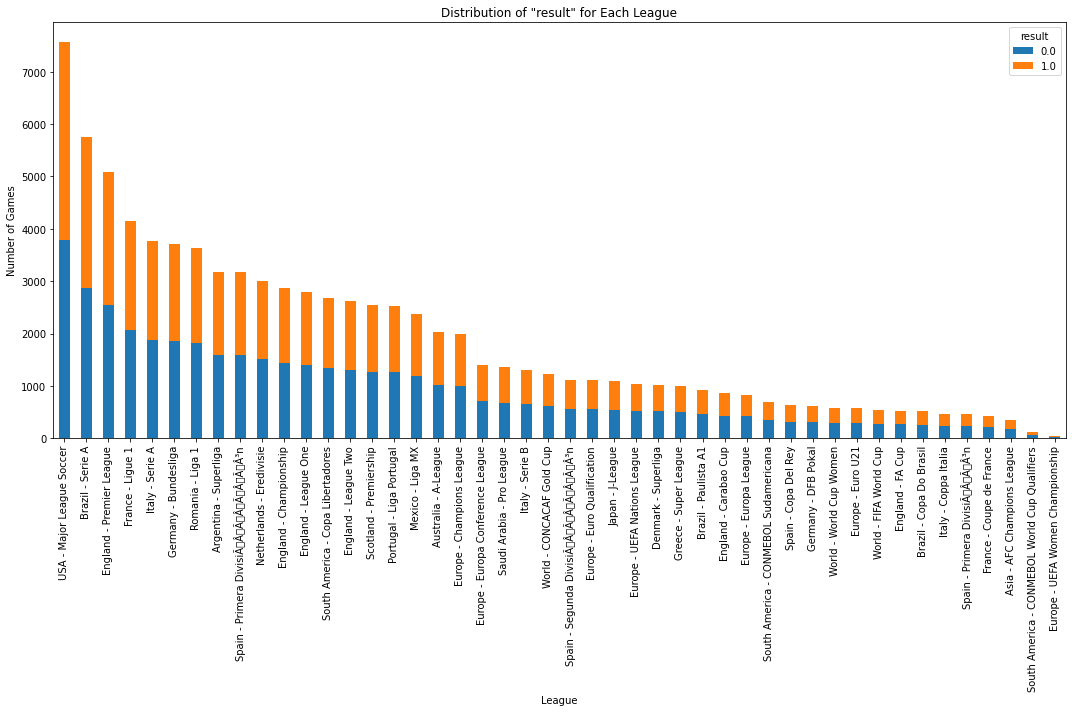

In [24]:
# Group the data by league and result and get the size of each group
league_distribution = df.groupby(['league', 'result']).size().unstack().fillna(0)

# Sort the leagues based on the total number of games
sorted_leagues = league_distribution.sum(axis=1).sort_values(ascending=False).head(100).index

# Plot
plt.figure(figsize=(15, 10))
league_distribution.loc[sorted_leagues].plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Distribution of "result" for Each League')
plt.ylabel('Number of Games')
plt.xlabel('League')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


In [25]:
df['result'].value_counts()

1.0    43114
0.0    43109
Name: result, dtype: int64

In [26]:
df.shape

(86223, 24)

In [26]:
df = df.sort_values('minute').reset_index(drop=True)
# df.to_csv('data_live_scores_balanced.csv', index=False)
# df = pd.read_csv('data_live_scores_balanced.csv')
# df = pd.read_csv('data_live_scores.csv')

In [27]:
# # IDs únicos no DataFrame
# unique_ids = df['match_id'].unique()

# invalid_ids = []

# for game_id in unique_ids:
#     # Obtenha as minutagens para o ID atual
#     game_df = df[df['match_id'] == game_id]
    
#     # Verifique se há minutos fora do intervalo permitido (maior que 57)
#     if any(game_df['minute'] > 57):
#         invalid_ids.append(game_id)
#         continue  # Pode pular para o próximo ID já que este é inválido
    
# # Remova os IDs inválidos do DataFrame original
# df_clean = df[~df['match_id'].isin(invalid_ids)]

In [28]:
# print(df_clean.shape)
# print(df.shape)

In [29]:
# df.to_csv("data_live_scores_clean.csv", index=False)

In [30]:
df.columns

Index(['minute', 'homeTeam', 'awayTeam', 'league', 'corners_home',
       'corners_away', 'redcards_home', 'redcards_away', 'shotsOffgoal_home',
       'shotsOffgoal_away', 'shotsOngoal_home', 'shotsOngoal_away',
       'yellowcards_home', 'yellowcards_away', 'fouls_home', 'fouls_away',
       'offsides_home', 'offsides_away', 'tackles_home', 'tackles_away',
       'result', 'match_id', 'possessiontime_away', 'possessiontime_home'],
      dtype='object')

In [1]:
# Separando os dados em características e variável alvo
# X = df.drop(columns=['result', 'homeTeam', 'awayTeam', 'match_id'])
X = df.drop(columns=['result', 'match_id'])
y = df['result']

# Definindo as colunas numéricas e categóricas
numeric_features = X.select_dtypes(exclude=['object']).columns.tolist()
categorical_features = ['homeTeam', 'awayTeam']

# Criando o transformador de colunas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Aplicando as transformações
X = preprocessor.fit_transform(X)

with open(f'../models/preprocessor.pickle', 'wb') as f:
    pickle.dump(preprocessor, f)

NameError: name 'df' is not defined

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,train_size=0.80, random_state=42)

# Modeling

## Automl h2o

In [33]:
# Inicializar o H2O
h2o.init()

# Convertendo dados do numpy para H2OFrame
X_train_h2o = h2o.H2OFrame(pd.DataFrame(X_train, columns=["col_" + str(i) for i in range(X_train.shape[1])]))
X_test_h2o = h2o.H2OFrame(pd.DataFrame(X_test, columns=["col_" + str(i) for i in range(X_test.shape[1])]))
y_train_h2o = h2o.H2OFrame(pd.DataFrame(y_train, columns=["result"]))
y_test_h2o = h2o.H2OFrame(pd.DataFrame(y_test, columns=["result"]))

# Convert Pandas DataFrame or NumPy array to H2OFrame
X_train_h2o = h2o.H2OFrame(X_train)
X_test_h2o = h2o.H2OFrame(X_test)

y_train_df = y_train.to_frame()
y_train_h2o = h2o.H2OFrame(y_train_df)
y_train_h2o['result'] = y_train_h2o['result'].asfactor()

y_test_df = y_test.to_frame()
y_test_h2o = h2o.H2OFrame(y_test_df)
y_test_h2o['result'] = y_test_h2o['result'].asfactor()

# Check the shape again
print("X_train_h2o shape:", X_train_h2o.shape)
print("y_train_h2o shape:", y_train_h2o.shape)
print("X_test_h2o shape:", X_test_h2o.shape)
print("y_test_h2o shape:", y_test_h2o.shape)

# Combine them back into one frame
train_data = X_train_h2o.cbind(y_train_h2o)
test_data = X_test_h2o.cbind(y_test_h2o)

# Identify predictors and response
x = train_data.columns

y = "result"
x.remove(y)

# Run AutoML
aml = H2OAutoML(max_models=20, seed=42)
aml.train(x=x, y=y, training_frame=train_data)

# View leaderboard
lb = aml.leaderboard
print(lb)

#save the model
model_path = h2o.save_model(model=aml.leader, path="../models/", force=True)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.8+9-LTS-211, mixed mode, sharing)
  Starting server from C:\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Pichau\AppData\Local\Temp\tmp5n4d4nxw
  JVM stdout: C:\Users\Pichau\AppData\Local\Temp\tmp5n4d4nxw\h2o_Pichau_started_from_python.out
  JVM stderr: C:\Users\Pichau\AppData\Local\Temp\tmp5n4d4nxw\h2o_Pichau_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,2 months and 24 days
H2O_cluster_name:,H2O_from_python_Pichau_ofitqn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.965 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
X_train_h2o shape: (67316, 64)
y_train_h2o shape: (67316, 1)
X_test_h2o shape: (16829, 64)
y_test_h2o shape: (16829, 1)
AutoML progress: |
22:42:31.439: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


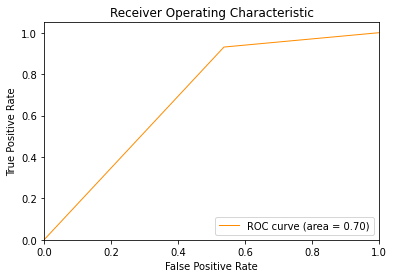

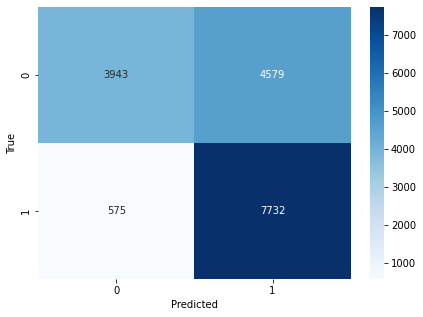

In [34]:
loaded_model = h2o.load_model("C:/Users/Pichau/Desktop/eofut/models/model_automl")
y_pred_prob = loaded_model.predict(X_test_h2o)
y_pred = h2o.as_list(y_pred_prob)
y_pred_prob = y_pred['predict'].tolist()

# Falsos positivos, verdadeiros positivos e limiares
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Área sob a curva
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Matriz de confusão
y_pred_round = [round(value) for value in y_pred_prob]
cm = confusion_matrix(y_test.to_list(), y_pred_round)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# In pratice

In [37]:
h2o.init()
loaded_model = h2o.load_model("C:/Users/Pichau/Desktop/eo-fut-live/models/model_automl")
Xht = df.drop(columns=['result', 'homeTeam', 'awayTeam', 'match_id']).head(1699).tail(1)
Xht = preprocessor.transform(Xht)
Xht = h2o.H2OFrame(Xht)
loaded_model.predict(Xht)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,53 mins 57 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,2 months and 24 days
H2O_cluster_name:,H2O_from_python_Pichau_ofitqn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.676 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p0,p1
1,0.384056,0.615944


In [38]:
h2o.as_list(loaded_model.predict(Xht)).loc[0, 'p1']

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


0.6159444728613503

## Random Forest

In [39]:
# teste com random forest foi feito mas não atingiu uma boa espectativa 
# # Criando o modelo base
# rfc = RandomForestClassifier(n_estimators=1000,max_depth=40, min_samples_leaf=1, min_samples_split=30, max_features=None, random_state=1, n_jobs=-1)

# import accuracy_score
from sklearn.metrics import accuracy_score



rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# # # Treinando o modelo com os melhores hiperparâmetros
rfc.fit(X_train, y_train)

predictions = rfc.predict(X_test)
accuracy = accuracy_score(y_test, predictions)


print(f" Teste Acurácia do modelo Random Forest: {accuracy * 100:.2f}%")
print(f"Erro quadrático médio: {mean_squared_error(y_test, predictions)}")
print(f"Treino Acurácia do modelo Random Forest: {rfc.score(X_train, y_train) * 100:.2f}%")

with open(f'random_forestht.pkl', 'wb') as f:
    pickle.dump(rfc, f)

 Teste Acurácia do modelo Random Forest: 74.41%
Erro quadrático médio: 0.2558678471685781
Treino Acurácia do modelo Random Forest: 93.32%


## Neural Network Keras

In [40]:
# X_train = X_train.toarray()
# X_test = X_test.toarray()

Epoch 1/500
1052/1052 [==============================] - 2s 1ms/step - loss: 0.6848 - accuracy: 0.5430 - precision: 0.5403 - recall: 0.5955 - val_loss: 0.6836 - val_accuracy: 0.5570 - val_precision: 0.5359 - val_recall: 0.7651
Epoch 2/500
1052/1052 [==============================] - 1s 1ms/step - loss: 0.6696 - accuracy: 0.5772 - precision: 0.5712 - recall: 0.6307 - val_loss: 0.6665 - val_accuracy: 0.5882 - val_precision: 0.5682 - val_recall: 0.6900
Epoch 3/500
1052/1052 [==============================] - 1s 1ms/step - loss: 0.6518 - accuracy: 0.6061 - precision: 0.5991 - recall: 0.6489 - val_loss: 0.6506 - val_accuracy: 0.6060 - val_precision: 0.5891 - val_recall: 0.6671
Epoch 4/500
1052/1052 [==============================] - 1s 1ms/step - loss: 0.6327 - accuracy: 0.6295 - precision: 0.6209 - recall: 0.6710 - val_loss: 0.6391 - val_accuracy: 0.6231 - val_precision: 0.6077 - val_recall: 0.6673
Epoch 5/500
1052/1052 [==============================] - 1s 1ms/step - loss: 0.6122 - accura

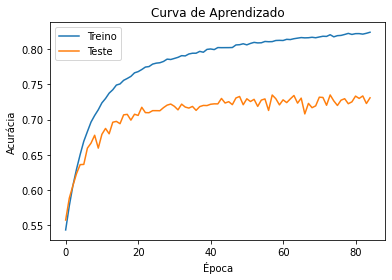

In [41]:
predictions = []
  
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))  # Binary classification


# Compilando o modelo
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy', 'Precision', 'Recall'])




early_stop = EarlyStopping(monitor='val_loss', patience=50)

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)
# history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data=(X_test, y_test), verbose=1)



# Faz a predição utilizando os dados de teste
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0)

# Avaliando a acurácia do modelo no conjunto de treinamento e conjunto de teste
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print('Accuracy on training set:', train_acc)
print('Accuracy on test set:', test_acc)

# Plotando a curva de aprendizado
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Curva de Aprendizado')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

# save model .h5
model.save('model_redeht.h5')